In [63]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, Nadam
from keras import regularizers
from keras import utils


In [64]:
PATH_TRAIN = "clean_data.csv"
PATH_TEST = "clean_test_data.csv"

train_df = pd.read_csv(PATH_TRAIN)
test_df = pd.read_csv(PATH_TEST)

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Train data shape: (13056, 91)
Test data shape: (3091, 91)


In [65]:
X_train_total = train_df.drop(["Participant_ID", "Depression"], axis=1)
y_train_total = train_df[["Participant_ID", "Depression", "Gender"]]

X_test = test_df.drop(["Participant_ID", "Depression"], axis=1)
y_test = test_df[["Participant_ID", "Depression", "Gender"]]

In [66]:
split_train = train_df[train_df['Participant_ID']<=460]
splt_val = train_df[train_df['Participant_ID']>460]

X_train = split_train.drop(["Participant_ID", "Depression"], axis=1)
y_train = split_train[["Participant_ID", "Depression", "Gender"]]

X_val = splt_val.drop(["Participant_ID", "Depression"], axis=1)
y_val = splt_val[["Participant_ID", "Depression", "Gender"]]

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_val = scaler.transform(X_val)

In [68]:
utils.set_random_seed(3)
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.L2(0.001)))
model3.add(Dense(32, activation='relu',kernel_regularizer=regularizers.L2(0.0005)))
# model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.01)))
model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model3.add(Dense(1, activation="sigmoid"))
model3.summary()
model3.compile(loss="binary_crossentropy", optimizer = Adam(learning_rate=0.001),metrics=["accuracy"])
model3.summary()
model3.compile(loss="binary_crossentropy", optimizer = Adam(learning_rate=0.001),metrics=["accuracy"])
trained_model = model3.fit(X_scaled, np.array(y_train["Depression"]), 
                           epochs=25,batch_size=32, 
                           validation_data=(X_scaled_val, np.array(y_val["Depression"])),
                           class_weight = {0: 1, 1: 4})


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 32)                2880      
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense_36 (Dense)            (None, 32)                2880      
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/25
352/352 [==============================] - 1s 650us/step - loss: 1.2399 - accuracy: 0.4626 - val_loss: 1.1401 - val_accuracy: 0.2682
Epoch 2/25
352/352 [==============================] - 0s 446us/step - loss: 1.0611 - accuracy: 0.6204 - val_loss: 1.1956 - val_accuracy: 0.3383
Epoch 3/25
352/352 [==============================] - 0s 438us/step - loss: 0.9195 - accuracy: 0.7038 - val_loss: 0.8971 - val_accuracy: 0.5419
Epoch 4/25
352/352 [==============================] - 0s 442us/step - loss: 0.8199 - accuracy: 0.7490 - val_loss: 1.0910 - val_accuracy: 0.4719
Epoch 5/25
352/352 [==============================] - 0s 442us/step - loss: 0.7493 - accuracy: 0.7768 - val_loss: 1.1241 - val_accuracy: 0.4685
Epoch 6/25
352/352 [==============================] - 0s 458us/step - loss: 0.6825 - accuracy: 0.8054 - val_loss: 0.8556 - val_accuracy: 0.6093
Epoch 7/25
352/352 [==============================] - 0s 439us/step - loss: 0.6402 - accuracy: 0.8209 - val_loss: 0.9111 - val_accuracy:

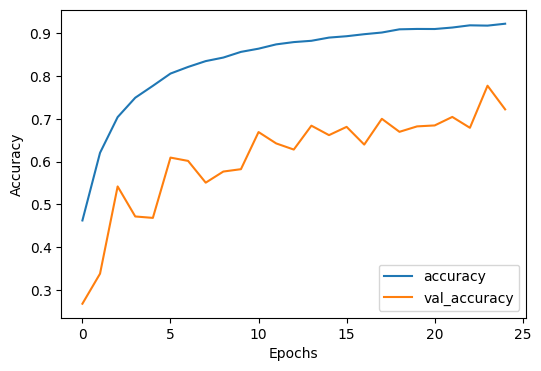

In [69]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(trained_model.history["accuracy"], label="accuracy")
plt.plot(trained_model.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Train on entire dataset and test it on test data

In [70]:
scaler = StandardScaler()
X_scaled_total = scaler.fit_transform(X_train_total)
X_scaled_test = scaler.transform(X_test)

In [71]:
utils.set_random_seed(3)
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_shape=(X_scaled.shape[1],),kernel_regularizer=regularizers.L2(0.0001)))
# model3.add(Dense(32, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model3.add(Dense(8, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
# model3.add(Dense(8, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model3.add(Dense(1, activation="sigmoid"))
model3.summary()
model3.compile(loss="binary_crossentropy", optimizer = Nadam(learning_rate=0.001),metrics=["accuracy"])


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 32)                2880      
                                                                 
 dense_41 (Dense)            (None, 16)                528       
                                                                 
 dense_42 (Dense)            (None, 8)                 136       
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3553 (13.88 KB)
Trainable params: 3553 (13.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
trained_model = model3.fit(X_scaled_total, np.array(y_train_total["Depression"]), 
                           epochs=20,batch_size=16, 
                           class_weight = {0: 1, 1: 4})

Epoch 1/20
816/816 [==============================] - 1s 412us/step - loss: 1.3161 - accuracy: 0.4439
Epoch 2/20
816/816 [==============================] - 0s 469us/step - loss: 1.1531 - accuracy: 0.5486
Epoch 3/20
816/816 [==============================] - 0s 385us/step - loss: 1.0028 - accuracy: 0.6713
Epoch 4/20
816/816 [==============================] - 0s 388us/step - loss: 0.8698 - accuracy: 0.7318
Epoch 5/20
816/816 [==============================] - 0s 394us/step - loss: 0.7878 - accuracy: 0.7607
Epoch 6/20
816/816 [==============================] - 0s 399us/step - loss: 0.7158 - accuracy: 0.7845
Epoch 7/20
816/816 [==============================] - 0s 387us/step - loss: 0.6676 - accuracy: 0.8045
Epoch 8/20
816/816 [==============================] - 0s 388us/step - loss: 0.6193 - accuracy: 0.8159
Epoch 9/20
816/816 [==============================] - 0s 390us/step - loss: 0.5921 - accuracy: 0.8274
Epoch 10/20
816/816 [==============================] - 0s 390us/step - loss: 0.557

In [73]:
y_pred = model3.predict(X_scaled_test)
y_test["Depression_predicted"] = np.where(y_pred>=0.5,1,0)

97/97 [==============================] - 0s 293us/step


/var/folders/12/c77x243n0cv4m_7jxmfpwxmc0000gn/T/ipykernel_60626/1096817474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Depression_predicted"] = np.where(y_pred>=0.5,1,0)


In [74]:
y_test

,Participant_ID,Depression,Gender,Depression_predicted
0,474,0,1,0
1,474,0,1,0
2,474,0,1,0
3,474,0,1,0
4,474,0,1,0
...,...,...,...,...
3086,479,0,1,0
3087,479,0,1,0
3088,479,0,1,0
3089,479,0,1,0


Accuracy: 0.8
Balanced Accuracy: 0.8095238095238095
Equality of Opportunity: 0.8


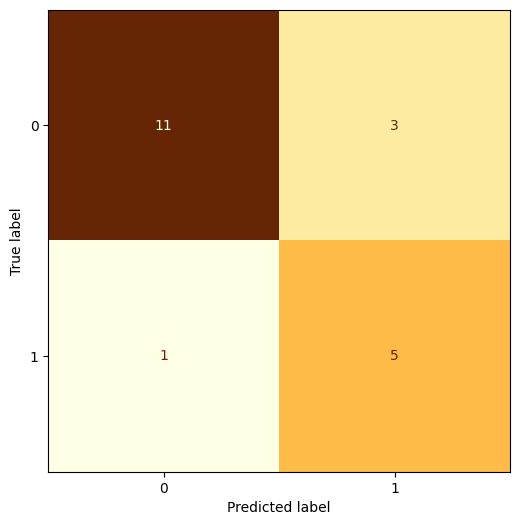

In [75]:
acc, bal_acc, eo_score = compute_metrics(y_test, eo=True)
print(f"Accuracy: {acc}")
print(f"Balanced Accuracy: {bal_acc}")
print(f"Equality of Opportunity: {eo_score}")
show_conf_matrix(y_test, model_name = "Fully Connected NNs")

In [76]:
X_train_total = train_df.drop(["Participant_ID", "Depression",'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0','loudness_sma3_percentile80.0','equivalentSoundLevel_dBp',
 'loudness_sma3_amean','F0semitoneFrom27.5Hz_sma3nz_amean','F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'loudness_sma3_pctlrange0-2'], axis=1)
y_train_total = train_df[["Participant_ID", "Depression", "Gender"]]

X_test = test_df.drop(["Participant_ID", "Depression",'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0','loudness_sma3_percentile80.0','equivalentSoundLevel_dBp',
 'loudness_sma3_amean','F0semitoneFrom27.5Hz_sma3nz_amean','F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'loudness_sma3_pctlrange0-2'], axis=1)
y_test = test_df[["Participant_ID", "Depression", "Gender"]]

In [77]:
split_train = train_df[train_df['Participant_ID']<=460]
splt_val = train_df[train_df['Participant_ID']>460]

X_train = split_train.drop(["Participant_ID", "Depression",'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0','loudness_sma3_percentile80.0','equivalentSoundLevel_dBp',
 'loudness_sma3_amean','F0semitoneFrom27.5Hz_sma3nz_amean','F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'loudness_sma3_pctlrange0-2'], axis=1)
y_train = split_train[["Participant_ID", "Depression", "Gender"]]

X_val = splt_val.drop(["Participant_ID", "Depression",'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0','loudness_sma3_percentile80.0','equivalentSoundLevel_dBp',
 'loudness_sma3_amean','F0semitoneFrom27.5Hz_sma3nz_amean','F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'loudness_sma3_pctlrange0-2'], axis=1)
y_val = splt_val[["Participant_ID", "Depression", "Gender"]]

In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_val = scaler.transform(X_val)
X_scaled_test = scaler.transform(X_test)

In [79]:
X_scaled.shape

(11244, 81)

In [80]:
utils.set_random_seed(3)
model_bias= Sequential()
model_bias.add(Dense(32, activation='relu', input_shape=(X_scaled.shape[1],),kernel_regularizer=regularizers.L2(0.0001)))
model_bias.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model_bias.add(Dense(8, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model_bias.add(Dense(1, activation="sigmoid"))
model_bias.summary()
model_bias.compile(loss="binary_crossentropy", optimizer = Nadam(learning_rate=0.001),metrics=["accuracy"])


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 32)                2624      
                                                                 
 dense_45 (Dense)            (None, 16)                528       
                                                                 
 dense_46 (Dense)            (None, 8)                 136       
                                                                 
 dense_47 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3297 (12.88 KB)
Trainable params: 3297 (12.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
trained_model_bias = model_bias.fit(X_scaled, np.array(y_train["Depression"]), 
                           epochs=20,batch_size=16, 
                           class_weight = {0: 1, 1: 4},validation_data = (X_scaled_val,np.array(y_val["Depression"])))

Epoch 1/20
703/703 [==============================] - 1s 588us/step - loss: 1.4006 - accuracy: 0.4448 - val_loss: 0.8683 - val_accuracy: 0.0784
Epoch 2/20
703/703 [==============================] - 0s 456us/step - loss: 1.2130 - accuracy: 0.4996 - val_loss: 0.8826 - val_accuracy: 0.2517
Epoch 3/20
703/703 [==============================] - 0s 459us/step - loss: 1.0810 - accuracy: 0.5990 - val_loss: 0.8158 - val_accuracy: 0.4007
Epoch 4/20
703/703 [==============================] - 0s 459us/step - loss: 0.9584 - accuracy: 0.6813 - val_loss: 0.9199 - val_accuracy: 0.3957
Epoch 5/20
703/703 [==============================] - 0s 499us/step - loss: 0.8668 - accuracy: 0.7214 - val_loss: 0.9482 - val_accuracy: 0.4172
Epoch 6/20
703/703 [==============================] - 0s 513us/step - loss: 0.7960 - accuracy: 0.7514 - val_loss: 0.8761 - val_accuracy: 0.4901
Epoch 7/20
703/703 [==============================] - 0s 480us/step - loss: 0.7387 - accuracy: 0.7713 - val_loss: 0.9624 - val_accuracy:

In [82]:
y_pred_bias = model_bias.predict(X_scaled_test)
y_test["Depression_predicted"] = np.where(y_pred_bias>=0.5,1,0)

97/97 [==============================] - 0s 267us/step


/var/folders/12/c77x243n0cv4m_7jxmfpwxmc0000gn/T/ipykernel_60626/2449201139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Depression_predicted"] = np.where(y_pred_bias>=0.5,1,0)


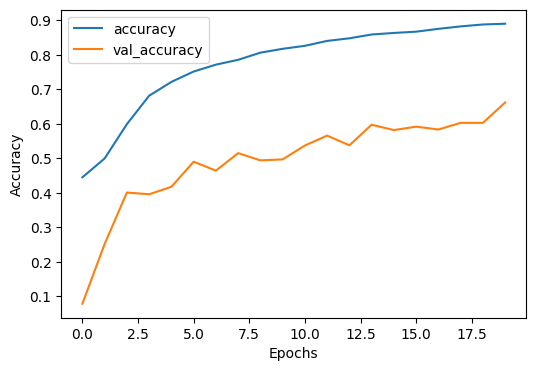

In [83]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(trained_model_bias.history["accuracy"], label="accuracy")
plt.plot(trained_model_bias.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

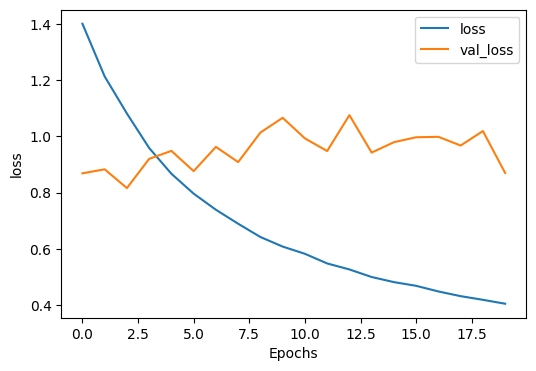

In [84]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(trained_model_bias.history["loss"], label="loss")
plt.plot(trained_model_bias.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Accuracy: 0.75
Balanced Accuracy: 0.7261904761904762
Equality of Opportunity: 0.6


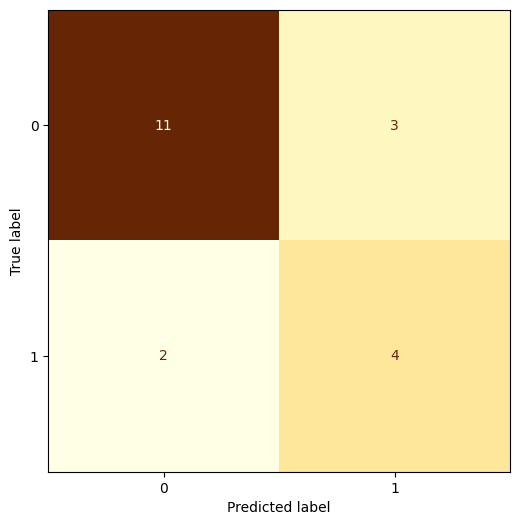

In [85]:
acc, bal_acc, eo_score = compute_metrics(y_test, eo=True)
print(f"Accuracy: {acc}")
print(f"Balanced Accuracy: {bal_acc}")
print(f"Equality of Opportunity: {eo_score}")
show_conf_matrix(y_test, model_name = "Fully Connected NNs")